# 四、	預測使用者指定之股票的走勢與價位

運用預言家模型處理股票資料，使用過去三年的資料訓練模型，並將最近一年的資料當成測試資料，驗證模型表現如何。  
此程式碼可以讓使用者自行調整短中長期的參數（prior sclae)，讓它預測出不同參數的走勢情況。  
並用最後一張圖呈現漲跌預測情況。

In [56]:
#!git clone https://github.com/koreal6803/Stocker.git
#!pip install -r Stocker/requirements.txt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import datetime
import time
import csv
import ffn
%matplotlib inline
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
import warnings
import pandas_datareader as pdr
import matplotlib
import mpl_finance as mpf ### 這個要先安裝！！（pip install mpl_finance）
import seaborn as sns
import datetime

### 去除煩人的 warrning
warnings.filterwarnings('ignore')

In [57]:
start = datetime.datetime(2008,1,1)
df_1101 = pdr.DataReader('2330.TW', 'yahoo', start=start)

df_1101.index = df_1101.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'),index_col='date', parse_dates=['date']) 

In [58]:
df_1101

,High,Low,Open,Close,Volume,Adj Close
2008-01-02,61.382099,59.599998,61.382099,59.896999,39300702.0,36.639996
2008-01-03,59.402000,58.807999,59.303001,58.807999,35123064.0,35.973835
2008-01-04,59.798000,57.916901,58.709000,59.402000,48851896.0,36.337196
2008-01-07,57.421902,55.243900,56.431900,55.243900,104088427.0,33.793613
2008-01-08,56.035900,54.946800,55.243900,55.441898,47704460.0,33.914730
...,...,...,...,...,...,...
2020-06-16,317.000000,314.000000,317.000000,315.000000,36608216.0,312.500000
2020-06-17,317.000000,313.500000,316.500000,315.000000,34522968.0,312.500000
2020-06-18,315.000000,313.000000,314.500000,314.500000,29044474.0,314.500000
2020-06-19,314.500000,312.000000,314.000000,314.500000,48130280.0,314.500000


In [59]:
import csv
df_1101.to_csv('2330_data.csv', index=True)
import pandas as pd
df = pd.read_csv('2330_data.csv')
df

,Unnamed: 0,High,Low,Open,Close,Volume,Adj Close
0,2008-01-02,61.382099,59.599998,61.382099,59.896999,39300702.0,36.639996
1,2008-01-03,59.402000,58.807999,59.303001,58.807999,35123064.0,35.973835
2,2008-01-04,59.798000,57.916901,58.709000,59.402000,48851896.0,36.337196
3,2008-01-07,57.421902,55.243900,56.431900,55.243900,104088427.0,33.793613
4,2008-01-08,56.035900,54.946800,55.243900,55.441898,47704460.0,33.914730
...,...,...,...,...,...,...,...
3060,2020-06-16,317.000000,314.000000,317.000000,315.000000,36608216.0,312.500000
3061,2020-06-17,317.000000,313.500000,316.500000,315.000000,34522968.0,312.500000
3062,2020-06-18,315.000000,313.000000,314.500000,314.500000,29044474.0,314.500000
3063,2020-06-19,314.500000,312.000000,314.000000,314.500000,48130280.0,314.500000


In [39]:
df = df.rename(columns={'Unnamed: 0':'date'}) #更換欄位名稱
df

,date,High,Low,Open,Close,Volume,Adj Close
0,2008-01-02,61.382099,59.599998,61.382099,59.896999,39300702.0,36.639996
1,2008-01-03,59.402000,58.807999,59.303001,58.807999,35123064.0,35.973835
2,2008-01-04,59.798000,57.916901,58.709000,59.402000,48851896.0,36.337196
3,2008-01-07,57.421902,55.243900,56.431900,55.243900,104088427.0,33.793613
4,2008-01-08,56.035900,54.946800,55.243900,55.441898,47704460.0,33.914730
...,...,...,...,...,...,...,...
3060,2020-06-16,317.000000,314.000000,317.000000,315.000000,36608216.0,312.500000
3061,2020-06-17,317.000000,313.500000,316.500000,315.000000,34522968.0,312.500000
3062,2020-06-18,315.000000,313.000000,314.500000,314.500000,29044474.0,314.500000
3063,2020-06-19,314.500000,312.000000,314.000000,314.500000,48130280.0,314.500000


In [40]:
df = df[['date','Close']] #選擇要用的欄位名稱
df

,date,Close
0,2008-01-02,59.896999
1,2008-01-03,58.807999
2,2008-01-04,59.402000
3,2008-01-07,55.243900
4,2008-01-08,55.441898
...,...,...
3060,2020-06-16,315.000000
3061,2020-06-17,315.000000
3062,2020-06-18,314.500000
3063,2020-06-19,314.500000


In [41]:
df.to_csv('2330_data.csv', index=False)
df = pd.read_csv('2330_data.csv',index_col='date', parse_dates=['date']) #將date設為index column
df

,Close
date,
2008-01-02,59.896999
2008-01-03,58.807999
2008-01-04,59.402000
2008-01-07,55.243900
2008-01-08,55.441898
...,...
2020-06-16,315.000000
2020-06-17,315.000000
2020-06-18,314.500000


In [42]:
price = df.squeeze()
price.head()
print(df)

                 Close
date                  
2008-01-02   59.896999
2008-01-03   58.807999
2008-01-04   59.402000
2008-01-07   55.243900
2008-01-08   55.441898
...                ...
2020-06-16  315.000000
2020-06-17  315.000000
2020-06-18  314.500000
2020-06-19  314.500000
2020-06-22  312.000000

[3065 rows x 1 columns]


In [43]:
print(df.squeeze)

<bound method NDFrame.squeeze of                  Close
date                  
2008-01-02   59.896999
2008-01-03   58.807999
2008-01-04   59.402000
2008-01-07   55.243900
2008-01-08   55.441898
...                ...
2020-06-16  315.000000
2020-06-17  315.000000
2020-06-18  314.500000
2020-06-19  314.500000
2020-06-22  312.000000

[3065 rows x 1 columns]>


In [44]:
from Stocker.stocker import Stocker

In [45]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2008-01-02 00:00:00 to 2020-06-22 00:00:00.


Predicted Price on 2020-09-20 00:00:00 = $313.98


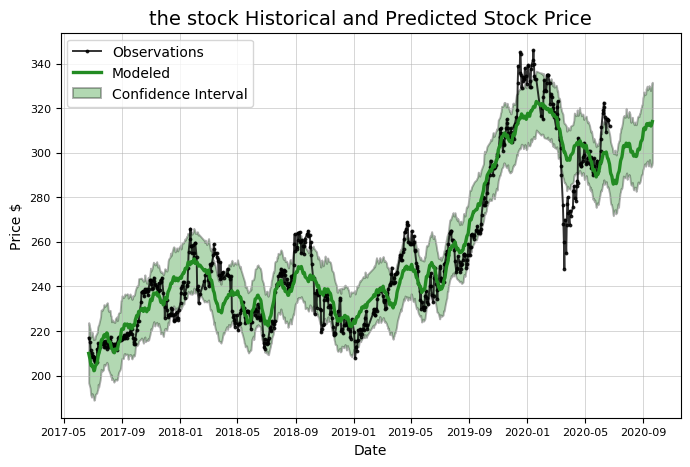

In [46]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2019-06-22 00:00:00 to 2020-06-22 00:00:00.

Predicted price on 2020-06-20 00:00:00 = $279.37.
Actual price on    2020-06-19 00:00:00 = $314.50.

Average Absolute Error on Training Data = $5.97.
Average Absolute Error on Testing  Data = $29.96.

When the model predicted an increase, the price increased 52.90% of the time.
When the model predicted a  decrease, the price decreased  50.49% of the time.

The actual value was within the 80% confidence interval 54.13% of the time.


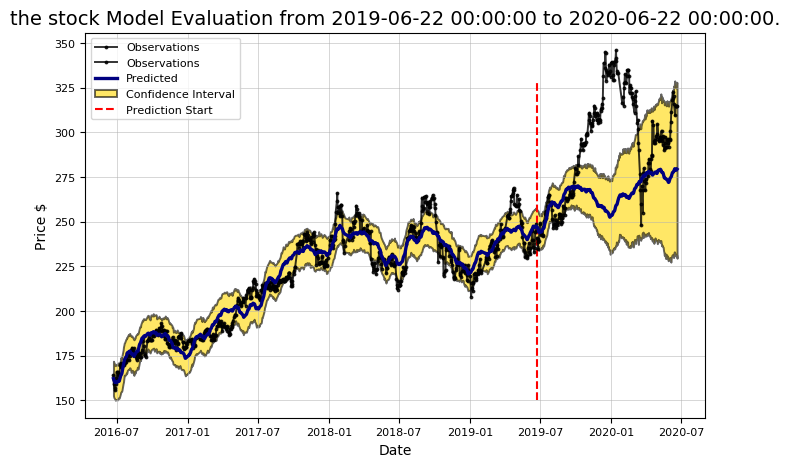

In [47]:
tsmc.evaluate_prediction()

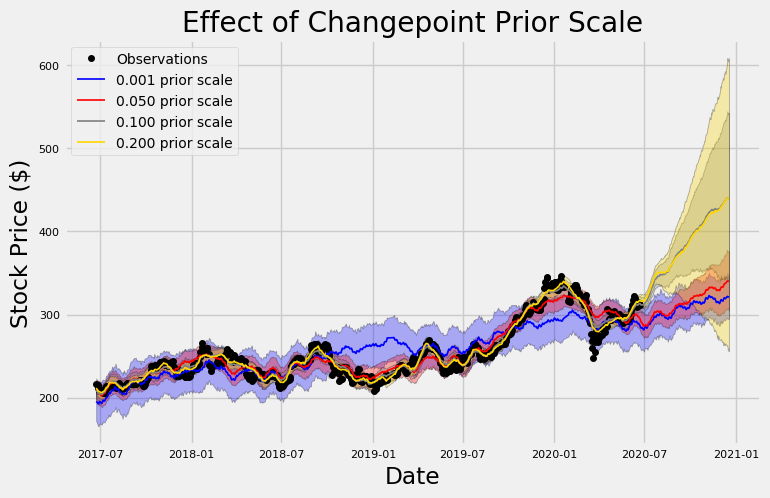

In [48]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2018-01-04 00:00:00 to 2020-06-01 00:00:00.

     cps  train_err  train_range   test_err  test_range
0  0.001   8.970230    26.829889  21.840546   26.938031
1  0.050   2.816305     9.006035  42.864297  172.892493
2  0.100   2.478196     7.916122  24.572488  339.104343
3  0.150   2.301763     7.355861  26.684606  487.061067
4  0.200   2.243757     7.196021  27.070210  572.798663
5  0.250   2.227808     7.136404  24.950824  593.917201
6  0.400   2.155744     6.908089  32.552105  771.378139
7  0.500   2.140843     6.895431  30.355095  823.128302
8  0.600   2.133173     6.862225  38.253065  893.607696


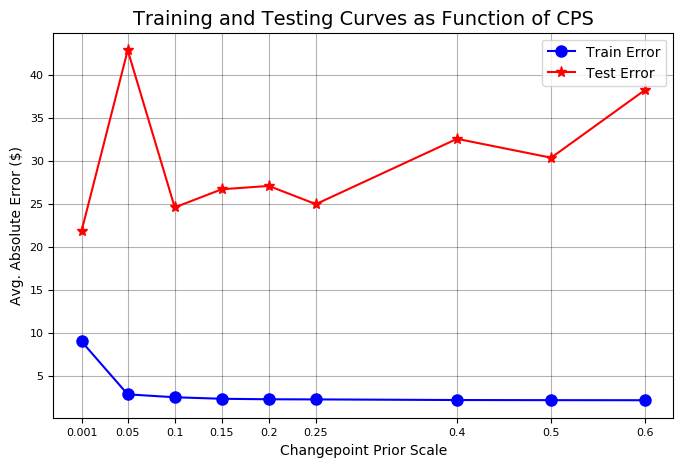

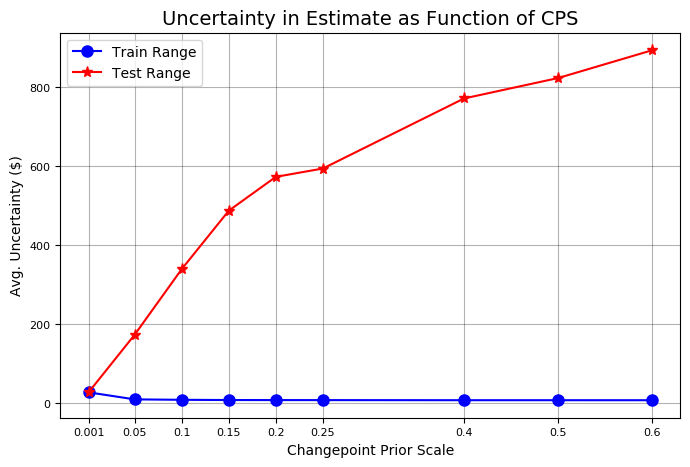

In [49]:
tsmc.changepoint_prior_validation(start_date='2018-01-04', end_date='2020-06-01', changepoint_priors=[0.001, 0.05, 0.1,0.15, 0.2, 0.25,0.4, 0.5, 0.6])


Prediction Range: 2019-06-22 00:00:00 to 2020-06-22 00:00:00.

Predicted price on 2020-06-20 00:00:00 = $245.66.
Actual price on    2020-06-19 00:00:00 = $314.50.

Average Absolute Error on Training Data = $4.00.
Average Absolute Error on Testing  Data = $52.02.

When the model predicted an increase, the price increased 50.39% of the time.
When the model predicted a  decrease, the price decreased  43.86% of the time.

The actual value was within the 80% confidence interval 84.71% of the time.


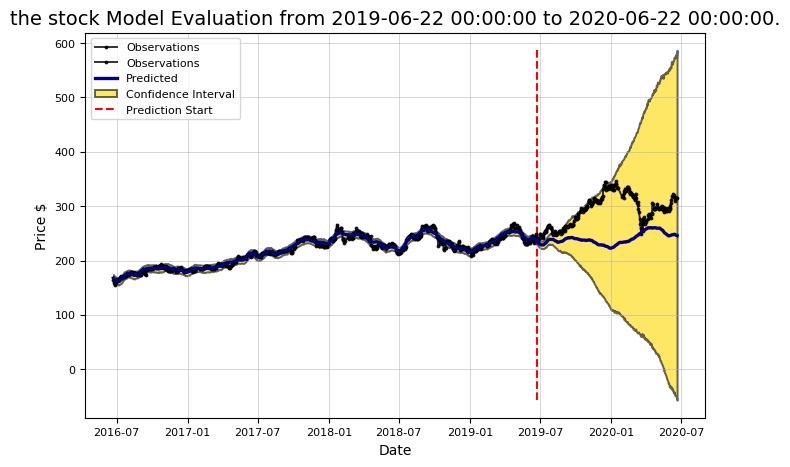

In [50]:
tsmc.changepoint_prior_scale = 0.25
tsmc.evaluate_prediction()


Predicted Increase: 

         Date    estimate    change       upper       lower
4  2020-06-26  315.250202  0.026319  323.084482  307.235099
8  2020-06-30  315.151755  0.244368  322.712988  307.692879
9  2020-07-01  315.895004  0.743249  322.970946  307.901589
10 2020-07-02  316.881571  0.986567  324.077390  309.223017
11 2020-07-03  317.728204  0.846633  326.356437  310.067483
13 2020-07-05  318.856850  1.128646  326.940799  310.812181
14 2020-07-06  319.781616  0.924766  327.891665  311.565165
15 2020-07-07  321.209355  1.427739  329.237352  312.302417
16 2020-07-08  322.874418  1.665063  331.095541  314.791523
17 2020-07-09  324.371251  1.496833  333.179672  316.764329
18 2020-07-10  325.563722  1.192472  334.159511  317.563671
20 2020-07-12  328.301970  2.738247  337.235470  319.345492
21 2020-07-13  330.381174  2.079204  340.113062  320.652879
22 2020-07-14  332.597340  2.216167  342.185106  323.139162
23 2020-07-15  334.384418  1.787078  344.435373  325.069215
24 2020-07-16  33

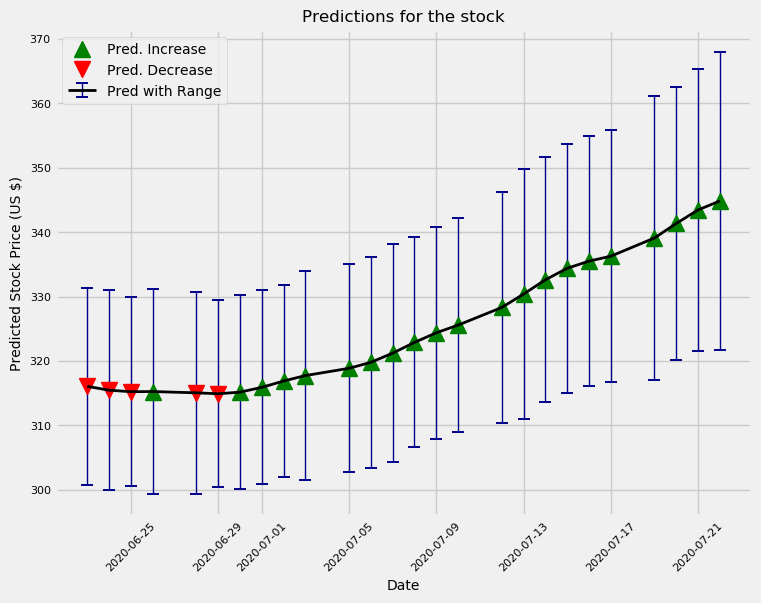

In [54]:
tsmc.predict_future(days=30)